# Recherche des zéros d'une fonction

In [1]:
# Numbering the equations

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Cosmétique
import matplotlib.cm as cm
from matplotlib.ticker import NullFormatter # useful for `logit` scale
# Set common figure parameters:
newparams = {'figure.figsize': (10, 8),
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

## Introduction 

Ce chapitre aborde le problème général qui consiste à trouver les solutions d'une équation numériquement. Cette classe de méthodes numériques apparaît souvent en physique dans les problèmes d'optimisation ou bien de calcul d'équilibre physique et dans certains algorithmes numériques tels que la méthode implicite pour la résolution d'une équation différentielle ordinaire. À une dimension, le problème peut toujours se mettre sous la forme suivante :
\begin{equation}
f(x) = 0 
\end{equation}
où $f$ est une fonction et $x$ est la (ou les) valeur(s) que l'on recherche. Ce sont les "racines" ou "zéros" de la fonction $f$. Il existe plusieurs méthodes numériques pour résoudre ce problème et ce chapitre traitera de deux méthodes classiques : la méthode de dichotomie et la méthode de Newton-Raphson. 

Ce problème se généralise à N-dimensions avec $n$ fonctions de $n$ variables sous la forme suivante :
\begin{eqnarray}
f_0(x_0, x_1, ..., x_n) =  0 \nonumber \\
f_1(x_0, x_1, ..., x_n) =  0 \nonumber  \\
...  = 0 \\
f_n(x_0, x_1, ..., x_n) =  0 \nonumber  \\
\end{eqnarray}
ou sous forme vectorielle
\begin{equation}
\vec{f}\left(\vec{x}\right) = \vec{0}. 
\end{equation}
Cependant, le problème devient alors bien plus compliqué à résoudre qu'à une seule dimension car il n'est plus possible d'encadrer la solution de manière efficace comme pour la méthode de dichotomie. Cependant, la méthode de Newton-Raphson se généralise facilement à $N$ dimensions.

## La méthode de dichotomie (à la maison)

### Présentation de la méthode  

La méthode de dichotomie consiste à choisir un intervalle qui contient une solution unique, puis à encadrer cette solution en divisant l'intervalle en deux parties égales (d'où le nom de la méthode) et en sélectionnant l'intervalle contenant la solution. Ces étapes sont répétées jusqu'à atteindre la solution suivant un critère de convergence. L'avantage de cette méthode est que l'algorithme converge toujours vers la solution, à condition qu'il n'y ait qu'une seule et unique solution dans l'intervalle de départ. 

Cette méthode repose sur le principe que la fonction change de signe au passage par la racine. Ainsi, pour un intervalle $[a,b]$ contenant la racine, le produit $f(a)f(b)$ est négatif. On divise l'intervalle en deux parties égales en posant $c = \frac{a+b}{2}$. Si le produit  $f(a)f(c)$ est négatif alors la racine est dans l'intervalle $[a,c]$, sinon la racine est dans l'intervalle $[c,b]$. Puis, on itére le processus jusqu'à un seuil de précision défini préalablement. Cette précision peut être soit sur la valeur de $x$, la racine, et les itérations stoppent lorsque la longueur de l'intervalle est inférieure à la précision $\varepsilon$ : $(b-a) < \varepsilon $ ; soit sur la proximité de $|f(x)|$ du zéro et le critère est de la forme $|f(x)| < \varepsilon$.

L'algorithme pourra s'écrire ainsi :  
- Soit un intervalle initial $[a,b]$ contenant une unique racine de la fonction $f$. 
- On divise l'intervalle en deux : $c = \frac{a+b}{2}$.  
- On calcule $f(a)f(c)$ et on détermine son signe. Si il est négatif alors l'intervalle suivant est $[a,c]$ sinon se sera $[c,b]$. 
- On itère le processus et le critère de sortie est défini par $(b-a) < \varepsilon $ ou $|f(x)| < \varepsilon$. 


Pour s'assurer que l'intervalle initial contient une seule et unique solution, on peut par exemple tracer la courbe. Il faut alors se méfier de la représentation graphique et notamment de la discrétisation utilisée pour tracer la courbe, surtout si celle-ci présente un gradient fort.   

La figure ci-dessous illustre la méthode :

!["figure dichotomie"](dichotomie.png)

*Fig. 1 : Méthode de dichotomie*

### Exercices

On prendra comme critère de convergence une précision de $\varepsilon = 10^{-8}$ sur la détermination de la racine. 

**1)** Écrire une fonction *dichotomie* qui contient l'algorithme de dichotomie et dont les paramètres d'entrée sont une fonction, a, b (les bornes de l'intervalle) et eps pour $\varepsilon$. La fonction retourne la valeur de la racine. 

**2)** Nous allons nous assurer que l'algorithme est écrit correctement en résolvant des équations dont on connaît les solutions. Vous pouvez tester par exemple : 
$$ f(x) = \cos{x} $$
$$ f(x) = x^2 - 4 $$

**3)** Introduire un compteur dans la fonction *dichotomie*.

**4)** Maintenant, nous pouvons résoudre l’équation suivante dont nous ne connaissons pas la solution a priori
$$ \cos{x} = x \;\;\; \textrm{soit} \;\;\;  f (x) = x − \cos{x} =0 $$ 

Tracer la fonction $f$ sur l’intervalle `[0; 3]` et sur une feuille de papier, dessiner quelques-unes des étapes successives de l’algorithme de dichotomie. 

Donner le résultat et le nombre d'itérations pour la fonction $f$ avec une précision de $10^{-8}$. 

In [4]:
# 1

# Version la plus simple de la méthode de dichotomie
def dichotomie0(f, a, b, eps): 
    """ Méthode de dichotomie avec un critère de convergence sur f(x) """
    # Dichotomie
    c = (a + b) / 2
    while abs(f(c)) > eps:
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        c = (a + b) / 2
    return c

# On l'améliore très vite pour prendre en compte certains cas spécifiques
def dichotomie0(f, a, b, eps): 
    """ Méthode de dichotomie avec un critère de convergence sur f(x) """
    # Vérification initiales
    if f(a) == 0:
        return a
    elif f(b) == 0:
        return b
    elif f(a) * f(b) >= 0:
        print("Pas de zéro unique dans l'intervalle [", a, ";", b, "]")
        return float('NaN') # None
    else:
        # Dichotomie
        c = (a + b) / 2
        while abs(f(c)) > eps:
            if f(c) == 0:
                return c
            elif f(a) * f(c) < 0:
                b = c
            else:
                a = c
            c = (a + b) / 2
        return c

In [5]:
# 2

# Fonctions tests
def f1(x):
    return np.cos(x)

def f2(x):
    return x ** 2 - 4

def f3(x):
    return x - np.cos(x)

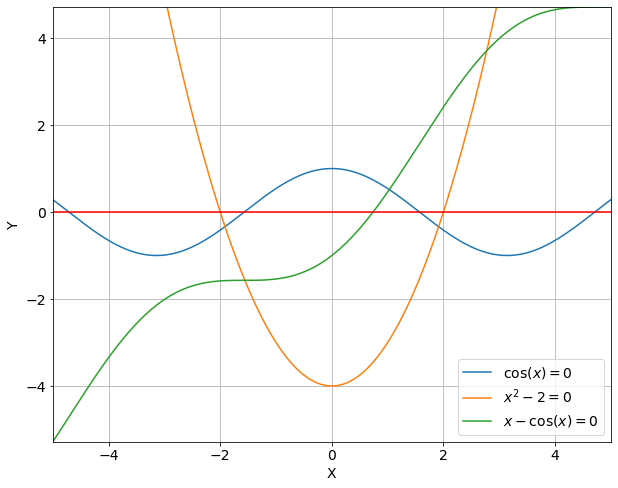

In [6]:
# Représentation graphique des fonctions
x =  np.linspace(-5, 5, 500)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)

plt.plot(x, y1, label = r'$\cos{(x)}=0$')
plt.plot(x, y2, label = r'$x^2-2=0$')
plt.plot(x, y3, label = r'$x - \cos{(x)}=0$')
plt.plot(x, 0 * y1, '-r')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.xlim(min(x), max(x))
plt.ylim(min(y3), max(y3))
plt.legend()
plt.show()

In [7]:
# Application aux fonctions de test
# On commence par l'application au cosinus

eps = 1.e-8

# Test sans particularité
a = 0
b = 2
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et π/2 =", np.pi / 2, "\n")

# Test avec une autre racine
a = 2
b = 5
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et 3π/2 =", 3 * np.pi / 2, "\n")

# Test sans solution car mauvais choix d'intervalle
a = 0.1
b = 0.4
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "\n")

# Test avec deux solutions car mauvais choix d'intervalle
a = -2
b = 2
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "\n")

# Test avec une solution qui est la borne inférieure de l'intervalle
a = np.pi / 2
b = 2
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et π/2 =", np.pi / 2, "\n")

# Test avec une solution qui est la borne supérieure de l'intervalle
a = 0
b = np.pi / 2
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et π/2 =", np.pi / 2, "\n")

# Test avec une solution qui est au milieu de l'intervalle
a = 0
b = np.pi
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et π/2 =", np.pi / 2)

Entre 0 et 2 la racine avec la méthode de dichotomie est 1.570796325802803 et π/2 = 1.5707963267948966 

Entre 2 et 5 la racine avec la méthode de dichotomie est 4.71238898485899 et 3π/2 = 4.71238898038469 

Pas de zéro unique dans l'intervalle [ 0.1 ; 0.4 ]
Entre 0.1 et 0.4 la racine avec la méthode de dichotomie est nan 

Pas de zéro unique dans l'intervalle [ -2 ; 2 ]
Entre -2 et 2 la racine avec la méthode de dichotomie est nan 

Entre 1.5707963267948966 et 2 la racine avec la méthode de dichotomie est 1.5707963331905297 et π/2 = 1.5707963267948966 

Pas de zéro unique dans l'intervalle [ 0 ; 1.5707963267948966 ]
Entre 0 et 1.5707963267948966 la racine avec la méthode de dichotomie est nan et π/2 = 1.5707963267948966 

Entre 0 et 3.141592653589793 la racine avec la méthode de dichotomie est 1.5707963267948966 et π/2 = 1.5707963267948966


Certains résultats observés semblent surprenants. Pourquoi certaines valeurs exactes ne sont pas trouvées par `dichotomie0()` ? Pourquoi même la fonction ne trouve-t-elle pas de valeur dans l'intervalle $\left[0, \frac{\pi}{2}\right]$ ? C'est normal, il y a la précision numérique qui rentre en compte. Au lieu de tester des égalités, il faudrait vérifier si les nombres sont "proches" à $\varepsilon$ près. Ça tombe bien, il y a une fonction qui fait ça : `math.isclose(nb1, nb2, eps)`, aussi présente dans le module numpy.

In [8]:
def dichotomie0(f, a, b, eps): 
    """ Méthode de dichotomie avec un critère de convergence sur f(x) """
    # Vérification initiales
    if np.isclose(f(a), 0, eps):
        return a
    elif np.isclose(f(b), 0, eps):
        return b
    elif f(a) * f(b) >= 0:
        print("Pas de zéro unique dans l'intervalle [", a, ";", b, "]")
        return float('NaN') # None
    else:
        # Dichotomie
        c = (a + b) / 2
        while abs(f(c)) > eps:
            if np.isclose(f(c), 0):
                return c
            elif f(a) * f(c) < 0:
                b = c
            else:
                a = c
            c = (a + b) / 2
        return c

In [9]:
# Application aux fonctions de test
# On refait l'application au cosinus après l'amélioration de la fonction dichotomie0

eps = 1.e-8

# Test sans particularité
a = 0
b = 2
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et π/2 =", np.pi / 2, "\n")

# Test avec une autre racine
a = 2
b = 5
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et 3π/2 =", 3 * np.pi / 2, "\n")

# Test sans solution car mauvais choix d'intervalle
a = 0.1
b = 0.4
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "\n")

# Test avec deux solutions car mauvais choix d'intervalle
a = -2
b = 2
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "\n")

# Test avec une solution qui est la borne inférieure de l'intervalle
a = np.pi / 2
b = 2
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et π/2 =", np.pi / 2, "\n")

# Test avec une solution qui est la borne supérieure de l'intervalle
a = 0
b = np.pi / 2
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et π/2 =", np.pi / 2, "\n")

# Test avec une solution qui est au milieu de l'intervalle
a = 0
b = np.pi
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f1, a, b, eps), "et π/2 =", np.pi / 2)

Entre 0 et 2 la racine avec la méthode de dichotomie est 1.570796325802803 et π/2 = 1.5707963267948966 

Entre 2 et 5 la racine avec la méthode de dichotomie est 4.71238898485899 et 3π/2 = 4.71238898038469 

Pas de zéro unique dans l'intervalle [ 0.1 ; 0.4 ]
Entre 0.1 et 0.4 la racine avec la méthode de dichotomie est nan 

Pas de zéro unique dans l'intervalle [ -2 ; 2 ]
Entre -2 et 2 la racine avec la méthode de dichotomie est nan 

Entre 1.5707963267948966 et 2 la racine avec la méthode de dichotomie est 1.5707963267948966 et π/2 = 1.5707963267948966 

Entre 0 et 1.5707963267948966 la racine avec la méthode de dichotomie est 1.5707963267948966 et π/2 = 1.5707963267948966 

Entre 0 et 3.141592653589793 la racine avec la méthode de dichotomie est 1.5707963267948966 et π/2 = 1.5707963267948966


In [10]:
# Application aux fonctions de test
# On applique x^2 - 4

eps = 1.e-8

# Test sans particularité
a = 0.3
b = 5
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f2, a, b, eps), "\n")

# Test avec une autre racine
a = -5
b = 0.3
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f2, a, b, eps), "\n")

# Test sans solution car mauvais choix d'intervalle
a = 0.1
b = 0.4
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f2, a, b, eps), "\n")

# Test avec deux solutions car mauvais choix d'intervalle
a = -5
b = 5
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f2, a, b, eps), "\n")

# Test avec une solution qui est la borne inférieure de l'intervalle
a = 2
b = 3
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f2, a, b, eps), "\n")

# Test avec une solution qui est la borne supérieure de l'intervalle
a = 1
b = 2
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f2, a, b, eps), "\n")

# Test avec une solution qui est au milieu de l'intervalle
a = 1
b = 3
print("Entre", a, "et", b, "la racine avec la méthode de dichotomie est", dichotomie0(f2, a, b, eps))

Entre 0.3 et 5 la racine avec la méthode de dichotomie est 1.9999999986961483 

Entre -5 et 0.3 la racine avec la méthode de dichotomie est -1.9999999997206026 

Pas de zéro unique dans l'intervalle [ 0.1 ; 0.4 ]
Entre 0.1 et 0.4 la racine avec la méthode de dichotomie est nan 

Pas de zéro unique dans l'intervalle [ -5 ; 5 ]
Entre -5 et 5 la racine avec la méthode de dichotomie est nan 

Entre 2 et 3 la racine avec la méthode de dichotomie est 2 

Entre 1 et 2 la racine avec la méthode de dichotomie est 2 

Entre 1 et 3 la racine avec la méthode de dichotomie est 2.0


In [11]:
# 3

def dichotomie(f, a, b, eps, cmax):
    """ Méthode de dichotomie améliorée avec la prise en compte d'un compteur et un critère de convergence sur x """
    # Vérification initiales
    if np.isclose(f(a), 0, eps):
        return a, 0
    elif np.isclose(f(b), 0, eps):
        return b, 0
    elif f(a) * f(b) >= 0:
        print("Pas de zéro unique dans l'intervalle [", a, ";", b, "]")
        return float('NaN'), 0 # None
    else:
        # Dichotomie
        compteur = 1
        while b - a > eps and compteur <= cmax:
            c = (a + b) / 2
            if np.isclose(f(c), 0):
                return c, compteur
            elif f(a) * f(c) < 0:
                b = c
            else:
                a = c
            compteur += 1
        if compteur > cmax:
            print("Limite du compteur atteinte")
        return c, compteur

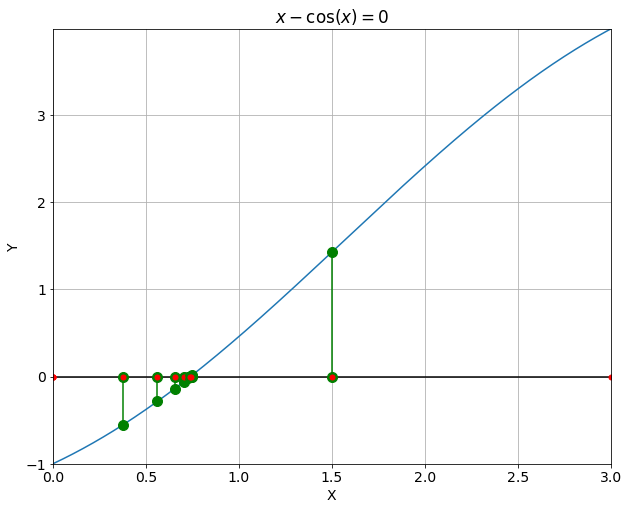

In [12]:
# 4

a = 0
b = 3

# Représentation graphique de f3
x =  np.linspace(a, b, 500)
y3 = f3(x)
plt.plot(x, y3)
plt.plot(x, 0 * y1, '-k')

# Ajout de quelques points pour illuster la méthode de dichotomie
for i in range(10):
    c = (a + b) / 2
    plt.plot([c, c], [0, f3(c)], 'o-g')
    plt.plot([a, b], [0, 0], '.r')
    if f3(a) * f3(c) < 0:
        b = c
    else:
        a = c

# Cosmétique
plt.title(r'$x - \cos{(x)}=0$')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.xlim(min(x), max(x))
plt.ylim(min(y3), max(y3))
plt.show()

In [13]:
# Application aux fonctions de test

eps = 1.e-8
cmax = 100

a = 0
b = 2
x0, compteur = dichotomie(f1, a, b, eps, cmax)
print("La racine obtenue en", compteur, "itérations par la méthode de dichotomie est", x0)

a = 0
b = 3.6
x0, compteur = dichotomie(f2, a, b, eps, cmax)
print("La racine obtenue en", compteur, "itérations par la méthode de dichotomie est", x0)

a = 0
b = 3
x0, compteur = dichotomie(f3, a, b, eps, cmax)
print("La racine obtenue en", compteur, "itérations par la méthode de dichotomie est", x0)

La racine obtenue en 27 itérations par la méthode de dichotomie est 1.570796325802803
La racine obtenue en 28 itérations par la méthode de dichotomie est 2.000000001490116
La racine obtenue en 27 itérations par la méthode de dichotomie est 0.7390851303935051


## La méthode de Newton-Raphson

### Présentation de la méthode 

La méthode de Newton-Raphson est une méthode classique à une dimension qui se généralise très bien à $N$ dimensions. D'un point de vue géométrique, cette méthode consiste à prolonger la tangente de la fonction $f$ à un point $x_i$ et à chercher son intersection avec l'axe des ordonnées en zéro. Ce point d'intersection est alors pris comme nouveau point de départ de la recherche $x_{i+1}$ et ainsi de suite jusqu'à ce que la fonction se rapproche suffisament du zéro. D'un point de vue algébrique, cette méthode repose sur le développement de Taylor. La fonction est approximée autour de $x_0$ au premier ordre par 
\begin{equation}
f(x) = f(x_0) + f'(x_0)(x-x_0)
\end{equation}
et donc $ f(x) =0$ implique que 
\begin{equation}
x = x_0 - \frac{f(x_0)}{f'(x_0)} 
\end{equation}
comme la fonction n'est a priori pas linéaire, il faut alors itérer le processus :
\begin{equation}
 x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}. 
\end{equation}
Comme précédemment, la condition d'arrêt porte soit sur la solution $x$ soit sur la fonction $f$. Cependant, contrairement au cas de la méthode de dichotomie, cette méthode recquiert le calcul de la dérivée de la fonction $f$, $f'$ (et donc d'avoir une fonction différentiable), et une seule condition de départ, $x_0$.

Cette méthode, bien qu'elle soit très efficace car sa convergence est plus rapide que la méthode de dichotomie, recèle de nombreux pièges qu'il faut connaître et reconnaître :
- le cas où la dérivée est très petite ou bien s'annulle. Le point itéré sera alors projeté loin du point de départ et l'approximation linéaire ne sera plus valide,  
- l'existence de plusieurs zéros. Dans ce cas, cette méthode ne permet pas de choisir le zéro désiré à moins de contraindre la solution sur un intervalle pré-défini,
- un cas où la fonction présente une courbure bien particulière et qui implique que l'algorithme se retrouve dans un cycle et donc ne converge pas. 

Pour éviter ces différents problèmes, il est conseillé de 
- stopper l'algorithme lorsque celui-ci diverge, le plus simple est d'imposer un nombre maximum d'itérations.
- préparer le problème par une analyse graphique et en calculant le comportement de la fonction aux asymptotes,
- parfois il est judicieux de reformuler le problème pour éliminer une racine. 

Si la dérivée analytique n'est pas calculable, on peut toujours la calculer numériquement par la méthode des différences finies. Cependant, dans ce cas la méthode converge beaucoup moins rapidement. 

La figure ci-dessous illustre la méthode :

!["figure dichotomie"](newton.png)

*Fig. 2: Méthode de Newton-Raphson*

### Exercices

On prendra comme critère de convergence une précision de $10^{-8}$ sur la détermination de la racine $(x^*)$. 


**1)** Tester la méthode de Newton-Raphson avec la fonction $f (x) = \sin{x}$ et le point de départ $x_0 = 0.1$.
Faire de même avec $x_0 = 1.55$, constater et expliquer. 

**2)** Maintenant, on compare la vitesse de convergence entre la méthode de dichotomie et la méthode de Newton-Raphson pour la fonction :
$$ f(x) = \sin{x} $$

avec $x_0=0.1$. 

**3)** Tester la méthode de Newton-Raphson sur $$ f(x) = \frac{1}{2} - \tanh{(x-1)} $$ avec $x_0=2$ et $x_0=3$. Expliquer ces comportements

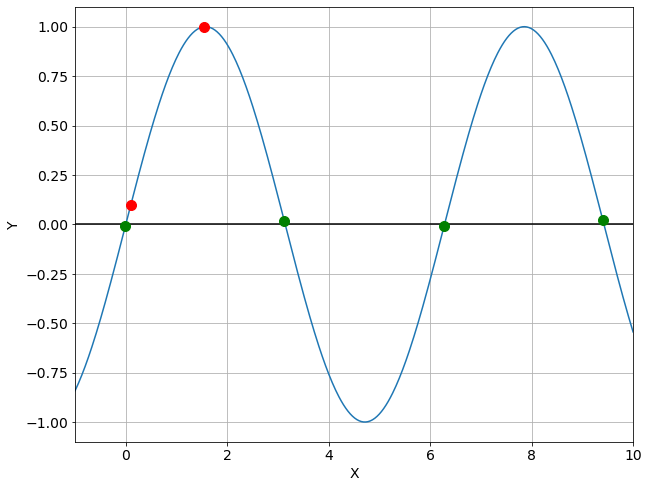

In [14]:
# 1 et 2

# Fonction test
def sinf(x):
    return np.sin(x)

def cosf(x):
    return np.cos(x)

# Affichage graphique de la fonction étudiée
x = np.linspace(-1, 10, 500)
y = sinf(x)

plt.plot(x, y)
plt.plot(x, 0 * y, '-k')
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.xlim(min(x), max(x))
plt.ylim(min(y) - 0.1, max(y) + 0.1)

# Ajout des points de départ
plt.plot(0.1, sinf(0.1), 'or')
plt.plot(1.55, sinf(1.55), 'or')

# Affichage des points les plus proches des zéros
idx = np.argwhere(np.diff(np.sign(y))).flatten()
plt.plot(x[idx], y[idx], 'og')

plt.show()

In [15]:
# La méthode de Newton-Raphson la plus simple possible
def newton_raphson0(f, fprime, x, eps):
    """ Méthode de Newton-Raphson """
    while abs(f(x)) > eps:
        x = x - f(x) / fprime(x)
    return x

# On l'améliore un peu avec un compteur
def newton_raphson(f, fprime, x, eps, cmax):
    """ Méthode de Newton-Raphson améliorée avec la prise en compte du compteur. """
    compteur = 0  
    while abs(f(x)) > eps and compteur < cmax:
        compteur += 1
        x = x - f(x) / fprime(x)
    return x, compteur

In [16]:
# Application aux fonctions test

eps = 1e-4

a = -0.2
b =  0.1 
x0, compteur_d = dichotomie(sinf, a, b, eps, cmax)
x1, compteur_n = newton_raphson(sinf, cosf, b, eps, cmax)
print("La racine avec la méthode de dichotomie est", x0, "et", x1, "avec la méthode de Newton-Raphson.")
print("Compteur pour la méthode de dichotomie :", compteur_d)
print("Itération pour la méthode de newton    :", compteur_n, "\n")

a = -0.1
b = 1.55
x0, compteur_d = dichotomie(sinf, a, b, eps, cmax)
x1, compteur_n = newton_raphson(sinf, cosf, b, eps, cmax)
print("La racine avec la méthode de dichotomie est", x0, "et", x1, "avec la méthode de Newton-Raphson. La racine", x1, "est un multiple de π. Le rapport vaut", x1 / np.pi)

La racine avec la méthode de dichotomie est 2.44140625e-05 et 1.249502806993999e-11 avec la méthode de Newton-Raphson.
Compteur pour la méthode de dichotomie : 13
Itération pour la méthode de newton    : 2 

La racine avec la méthode de dichotomie est -4.730224609375442e-05 et -47.12388980384899 avec la méthode de Newton-Raphson. La racine -47.12388980384899 est un multiple de π. Le rapport vaut -15.000000000000666


La méthode de Newton-Raphson converge bien plus vite que la dichotomie vers la solution.

Mais si on se place proche d'un point pour lequel la dérivée est presque nulle, celle-ci croise l'axe des abscisses très loin, et on se retrouve avec un zéro, mais pas forcément le zéro le plus proche du point initial.

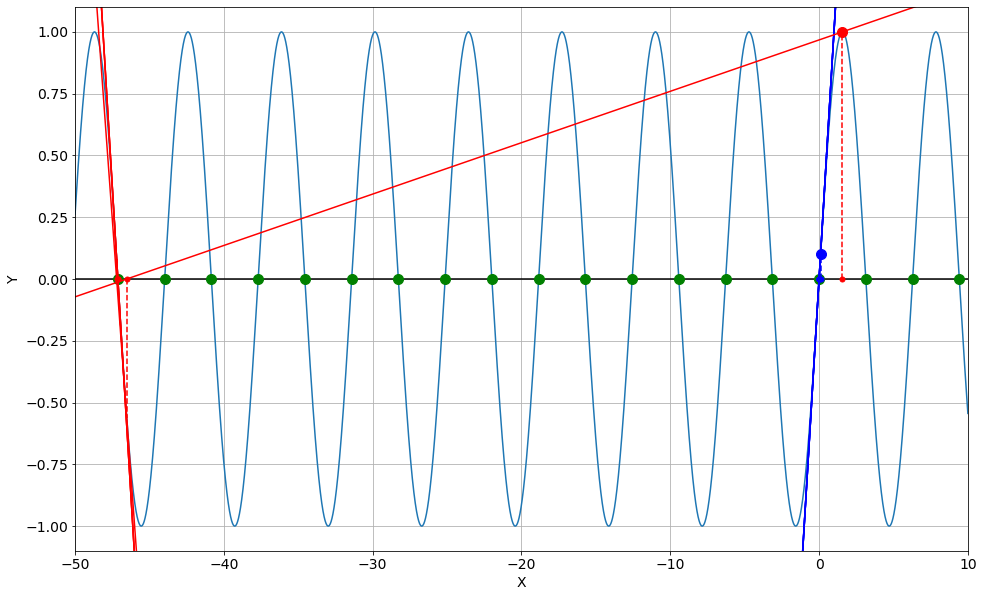

In [17]:
# Affichage graphique de la fonction étudiée
x = np.linspace(-50, 10, 100000)
y = sinf(x)

plt.figure(figsize = (16, 10)) # Cosmétique

plt.plot(x, y)
plt.plot(x, 0 * y, '-k')

# Cosmétique
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.xlim(min(x), max(x))
plt.ylim(min(y) - 0.1, max(y) + 0.1)

# Affichage des points les plus proches des zéros
idx = np.argwhere(np.diff(np.sign(y))).flatten()
plt.plot(x[idx], y[idx], 'og')

# Ajout des points de départ
plt.plot(0.1, sinf(0.1), 'ob')
plt.plot(1.55, sinf(1.55), 'or')

# Tracé de la méthode pour x0 = 0.1
x0 = 0.1
for i in range(5):
    plt.plot(x, sinf(x0) + cosf(x0) * (x - x0), 'b')
    plt.plot([x0, x0], [0, sinf(x0)], '--b')
    plt.plot(x0, 0, '.b')
    x0 = x0 - sinf(x0) / cosf(x0)

# Tracé de la méthode pour x0 = 1.55
x0 = 1.55
for i in range(5):
    plt.plot(x, sinf(x0) + cosf(x0) * (x - x0), 'r')
    plt.plot([x0, x0], [0, sinf(x0)], '--r')
    plt.plot(x0, 0, '.r')
    x0 = x0 - sinf(x0) / cosf(x0)

plt.show()

<ipython-input-18-ae1b643898c4>:9: RuntimeWarning: overflow encountered in cosh
  y = -1. / np.cosh(x - 1) ** 2
<ipython-input-18-ae1b643898c4>:9: RuntimeWarning: overflow encountered in cosh
  y = -1. / np.cosh(x - 1) ** 2
<ipython-input-18-ae1b643898c4>:42: RuntimeWarning: divide by zero encountered in double_scalars
  x0 = x0 - tanhf(x0) / dtanhf(x0)


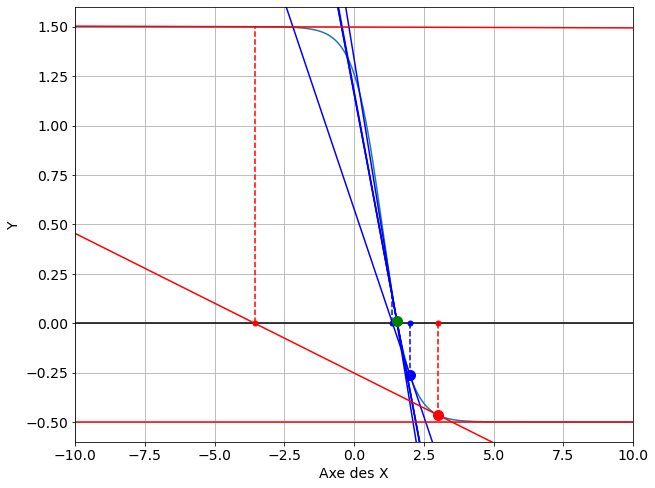

In [18]:
# 3

# Fonction test f(x) = sin(x)
def tanhf(x):
    y = 0.5 - np.tanh(x - 1)
    return y

def dtanhf(x):
    y = -1. / np.cosh(x - 1) ** 2
    return y

# Affichage graphique de la fonction étudiée
x = np.linspace(-10, 10, 1000)
y = tanhf(x)

plt.xlabel("Axe des X")
plt.ylabel("Y")
plt.plot(x, y)
plt.plot(x, 0 * y, '-k')
plt.grid(True)
plt.xlim(min(x), max(x))
plt.ylim(min(y) - 0.1, max(y) + 0.1)

# Ajout des points de départ
plt.plot(2, tanhf(2), 'ob')
plt.plot(3, tanhf(3), 'or')

# Tracé de la méthode pour x0 = 2
x0 = 2
for i in range(5):
    plt.plot(x, tanhf(x0) + dtanhf(x0) * (x - x0), 'b')
    plt.plot([x0, x0], [0, tanhf(x0)], '--b')
    plt.plot(x0, 0, '.b')
    x0 = x0 - tanhf(x0) / dtanhf(x0)
    
# Tracé de la méthode pour x0 = 3
x0 = 3
for i in range(3):
    plt.plot(x, tanhf(x0) + dtanhf(x0) * (x - x0), 'r')
    plt.plot([x0, x0], [0, tanhf(x0)], '--r')
    plt.plot(x0, 0, '.r')
    x0 = x0 - tanhf(x0) / dtanhf(x0)

# Affichage du point le plus proche du zéro
idx = np.argwhere(np.diff(np.sign(y))).flatten()
plt.plot(x[idx], y[idx], 'og')

plt.show()

In [19]:
a = 0
b = 2
x0, compteur = dichotomie(tanhf, a, b, eps, cmax)
x1, compteur = newton_raphson(tanhf, dtanhf, b, eps, cmax)
print("La racine avec la méthode de dichotomie est", x0, "et", x1, "avec la méthode de Newton.")

b = 3
x1, compteur = newton_raphson(tanhf, dtanhf, b, eps, cmax)
print("La racine avec la méthode de dichotomie est", x0, "et", x1, "avec la méthode de Newton.")

La racine avec la méthode de dichotomie est 1.54925537109375 et 1.5492404932704658 avec la méthode de Newton.
La racine avec la méthode de dichotomie est 1.54925537109375 et nan avec la méthode de Newton.


<ipython-input-18-ae1b643898c4>:9: RuntimeWarning: overflow encountered in cosh
  y = -1. / np.cosh(x - 1) ** 2
<ipython-input-15-87187ca66592>:14: RuntimeWarning: divide by zero encountered in double_scalars
  x = x - f(x) / fprime(x)
<ipython-input-15-87187ca66592>:14: RuntimeWarning: invalid value encountered in double_scalars
  x = x - f(x) / fprime(x)


Ici avec la dérivée en $2$ il y a convergence, mais la dérivée en $3$ éloigne l'algorithme de la racine, et la dérivée suivante est très proche de $0$. On finit par s'éloigner de plus en plus de la racine, jusqu'à ce que la dérivée soit trop proche de $0$, et alors il y a division par $0$, d'où l'erreur affichée.

## Références

Depondt, *Physique Numérique*

Press *et al.*, *Numerical Recipes*